In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df=pd.read_csv('student.csv')

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Preparing dependent and independent features

In [5]:
x=df.drop('math_score',axis=1)

In [6]:
y=df['math_score']

In [7]:
count_cols=df[['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course']]

for category in count_cols:
    print(f"The value counts of {category}")
    val_counts=count_cols[category].value_counts()
    print(val_counts)
    print('*****************************************')

The value counts of gender
gender
female    518
male      482
Name: count, dtype: int64
*****************************************
The value counts of race_ethnicity
race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
*****************************************
The value counts of parental_level_of_education
parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
*****************************************
The value counts of lunch
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
*****************************************
The value counts of test_preparation_course
test_preparation_course
none         642
completed    358
Name: count, dtype: int64
*****************************************


In [8]:
num_cols=[features for features in df.columns if df[features].dtypes!='object']
cat_cols=[features for features in df.columns if df[features].dtypes=='object']

print(f"We have {len(num_cols)} numerical features: {num_cols}")
print(f"We have {len(cat_cols)} categorical features: {cat_cols}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Column Transformer for encoding

In [9]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [10]:
x=preprocessor.fit_transform(x)

In [11]:
# Splitting data into train test split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [12]:
def evaluate(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    score=r2_score(true,predicted)
    return mae,mse,rmse,score

In [13]:
models={
    "LinearRegression":LinearRegression(),
    "RidgeRegression":Ridge(),
    "LassoRegression":Lasso(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(xtrain,ytrain)

    #make predictions
    ytrainpred=model.predict(xtrain)
    ytestpred=model.predict(xtest)

    #evalute train and test data
    modeltrain_mae,modeltrain_mse,modeltrain_rmse,modeltrain_r2score=evaluate(ytrain,ytrainpred)
    modeltest_mae,modeltest_mse,modeltest_rmse,modeltest_r2score=evaluate(ytest,ytestpred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for training data")
    print(f"Mean absolute error: {modeltrain_mae}")
    print(f"Mean squared error: {modeltrain_mse}")
    print(f"Mean root mean squared error: {modeltrain_rmse}")
    print(f"R squared error: {modeltrain_r2score}")

    print("-----------------------------------------------------")

    print("Model performance for testing data")
    print(f"Mean absolute error: {modeltest_mae}")
    print(f"Mean squared error: {modeltest_mse}")
    print(f"Mean root mean squared error: {modeltest_rmse}")
    print(f"R squared error: {modeltest_r2score}")

    r2_list.append(modeltest_r2score)

    print("="*35)
    print("\n")

LinearRegression
Model performance for training data
Mean absolute error: 4.267109375
Mean squared error: 28.348541259765625
Mean root mean squared error: 5.32433481852575
R squared error: 0.8742565651513869
-----------------------------------------------------
Model performance for testing data
Mean absolute error: 4.2158203125
Mean squared error: 29.116678771972655
Mean root mean squared error: 5.3959872842671395
R squared error: 0.8803449074540941


RidgeRegression
Model performance for training data
Mean absolute error: 4.26498782372598
Mean squared error: 28.337788233082442
Mean root mean squared error: 5.323324922741654
R squared error: 0.8743042615212909
-----------------------------------------------------
Model performance for testing data
Mean absolute error: 4.211100688014259
Mean squared error: 29.056272192348274
Mean root mean squared error: 5.3903870169356365
R squared error: 0.8805931485028738


LassoRegression
Model performance for training data
Mean absolute error: 5.2

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
1,RidgeRegression,0.880593
0,LinearRegression,0.880345
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849290
8,AdaBoost Regressor,0.848309
6,XGBRegressor,0.827797
2,LassoRegression,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.710650


# Linear Regression

In [15]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(xtrain,ytrain)
y_pred=lin_model.predict(xtest)
r2score=r2_score(ytest,y_pred)
print(f"Accuracy of the model is {round(r2score,4)*100}")

Accuracy of the model is 88.03


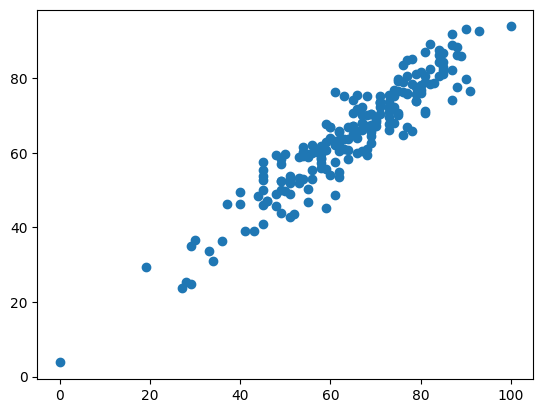

In [16]:
plt.scatter(ytest,y_pred)

In [17]:
pred_df=pd.DataFrame({'Actual Value':ytest,'Predicted Value':y_pred,'Difference':ytest-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
